In [60]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [61]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random

In [0]:
np.random.seed(0)

In [64]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)
  
print(type(train_data))
X_train , y_train = train_data['features'], train_data['labels']
X_val , y_val = val_data['features'], val_data['labels']
X_test , y_test= test_data['features'], test_data['labels']

<class 'dict'>


In [65]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [0]:
assert(X_train.shape[0] == y_train.shape[0]), "the number of images is not equal to the number of labels"
assert(X_val.shape[0] == y_val.shape[0]), "the number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "the number of images is not equal to the number of labels"
assert(X_train.shape[1 :] ==(32 , 32 ,3) ),"the dimensions of the images are not 32x32x3"
assert(X_val.shape[1 :] ==(32 , 32 ,3) ),"the dimensions of the images are not 32x32x3"
assert(X_test.shape[1 :] ==(32 , 32 ,3) ),"the dimensions of the images are not 32x32x3"

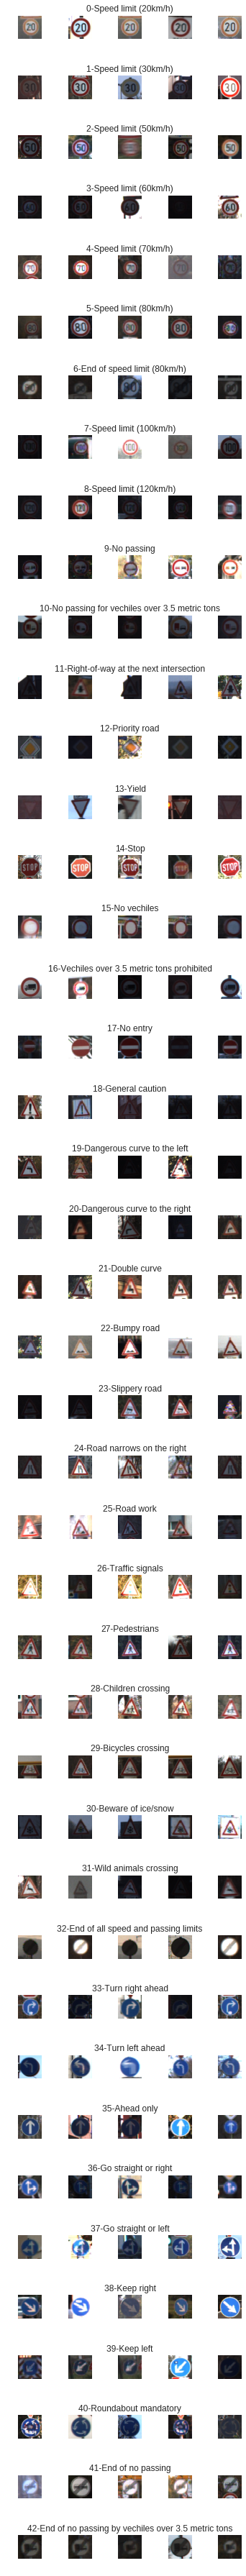

In [67]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
# print(data)
num_of_samples=[] 

#data will be in 5 columns
cols =5
#no of classes 43
num_classes=43

fig,axs = plt.subplots(nrows= num_classes, ncols = cols, figsize=(5,50))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_selected = X_train[y_train==j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected)-1)),:,:],cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i==2:
            axs[j][i].set_title(str(j)+ "-"+ row["SignName"])
            num_of_samples.append(len(x_selected))
            
            
            
            
# data.iterrows iterates as pair in (index,Series)            
 

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'number of images')

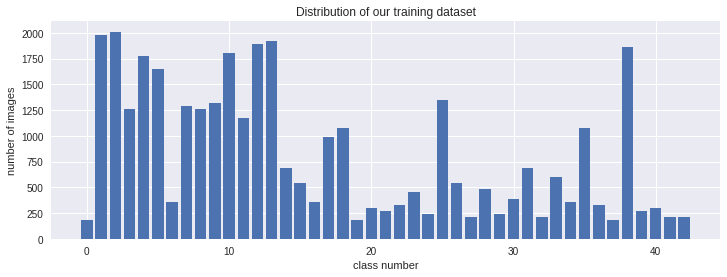

In [68]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution of our training dataset")
plt.xlabel("class number")
plt.ylabel("number of images")

(32, 32, 3)
36


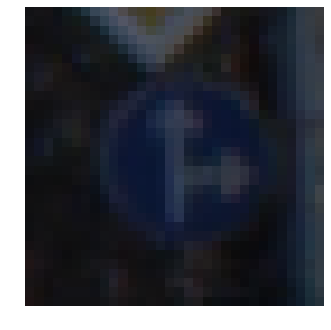

In [69]:
import cv2

plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000]) 

(32, 32)


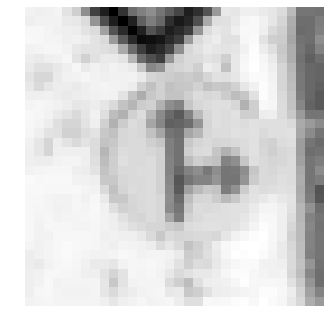

In [70]:
def grayscale(img):
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img

img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis("off")
print(img.shape)

(-0.5, 31.5, 31.5, -0.5)

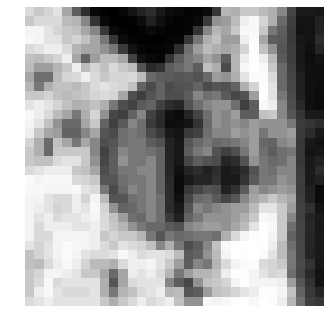

In [71]:
def equalize(img):
  # equalizeHist will only accept grayscale image i.e image with depth 1
  img = cv2.equalizeHist(img)
  return img

img = equalize(img)
plt.imshow(img)
plt.axis("off")

In [0]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img

#this will iterate through entire array & for every element of that array that it loops through
#it returns a new element based on the specified function that allocated for each item in the array
# ultimately creating a new array with updated values 
X_train = np.array(list(map(preprocessing,X_train)))
X_val = np.array(list(map(preprocessing,X_val)))
X_test = np.array(list(map(preprocessing,X_test)))

(34799, 32, 32)


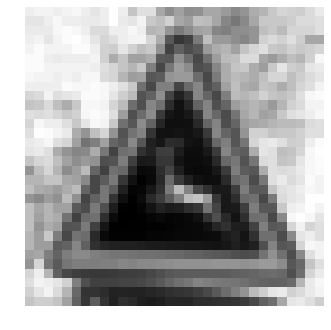

In [73]:
plt.imshow(X_train[random.randint(0, len(X_train)-1)])
plt.axis("off")
print(X_train.shape)

In [0]:
X_train = X_train.reshape(34799,32,32,1)
X_test = X_test.reshape(12630,32,32,1)
X_val = X_val.reshape(4410,32,32,1)

In [0]:
# Data Augmentation step
from keras.preprocessing.image import ImageDataGenerator

# width_shift_range..........refers......to horizontal translation in image rangr(0 -1)
# height_shift_range ..........refers......to vertical translation in image rangr(0 -1) ,
# zoom_range zoom out or zoom in =====(float_value b/w 0 -1) , max outerzoom 1-float_value
# max inner zoom 1+float_value
# shear_range,
# rotation_range
datagen = ImageDataGenerator (width_shift_range = 0.1 ,
                    height_shift_range = 0.1 ,
                    zoom_range = 0.2,
                    shear_range = 0.1,
                    rotation_range = 10)

datagen.fit(X_train)

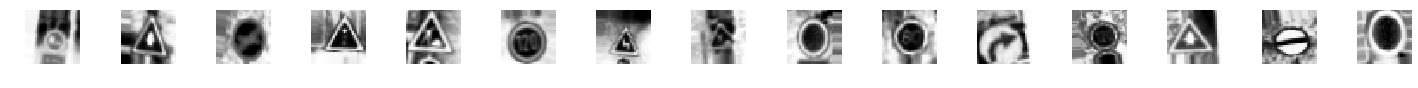

In [76]:
batches = datagen.flow(X_train,y_train, batch_size = 20)
X_batch,y_batch = next(batches)

fig, axs = plt.subplots(1,15, figsize=(20,5))
fig.tight_layout()

for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32, 32))
  axs[i].axis("off")

In [77]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [0]:
#One Hot Encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

In [0]:
def modified_model():
  model= Sequential()
  model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu' ))
  model.add(Conv2D(60, (5, 5), activation='relu' ))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
#   model.add(Dropout(0.5))
  
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  #0.5 is recommended
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [80]:
model = modified_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 480)               0         
__________

In [81]:
# history =model.fit(X_train, y_train, epochs=10, validation_data=(X_val,y_val), batch_size= 400, verbose= 1, shuffle=1)
history =model.fit_generator(datagen.flow(X_train,y_train, batch_size=50) , steps_per_epoch =2000, epochs = 10, validation_data=(X_val,y_val), shuffle=1)

Epoch 1/10
2000/2000 [==============================] - 54s 27ms/step - loss: 0.8804 - acc: 0.7409 - val_loss: 0.0738 - val_acc: 0.9741
Epoch 2/10
2000/2000 [==============================] - 52s 26ms/step - loss: 0.1988 - acc: 0.9374 - val_loss: 0.0439 - val_acc: 0.9848
Epoch 3/10
2000/2000 [==============================] - 52s 26ms/step - loss: 0.1341 - acc: 0.9585 - val_loss: 0.0349 - val_acc: 0.9893
Epoch 4/10
2000/2000 [==============================] - 56s 28ms/step - loss: 0.1069 - acc: 0.9667 - val_loss: 0.0363 - val_acc: 0.9918
Epoch 5/10
2000/2000 [==============================] - 56s 28ms/step - loss: 0.0899 - acc: 0.9724 - val_loss: 0.0224 - val_acc: 0.9943
Epoch 6/10
2000/2000 [==============================] - 56s 28ms/step - loss: 0.0812 - acc: 0.9750 - val_loss: 0.0273 - val_acc: 0.9918
Epoch 7/10
2000/2000 [==============================] - 56s 28ms/step - loss: 0.0718 - acc: 0.9781 - val_loss: 0.0433 - val_acc: 0.9866
Epoch 8/10
2000/2000 [==========================

Text(0.5, 0, 'epoch')

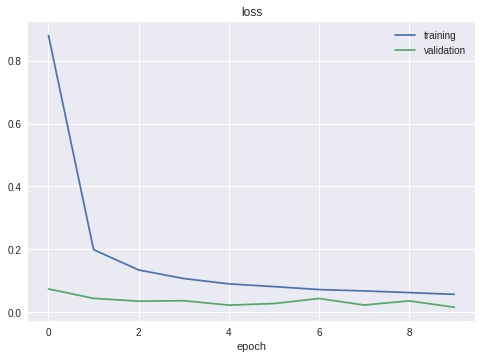

In [82]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

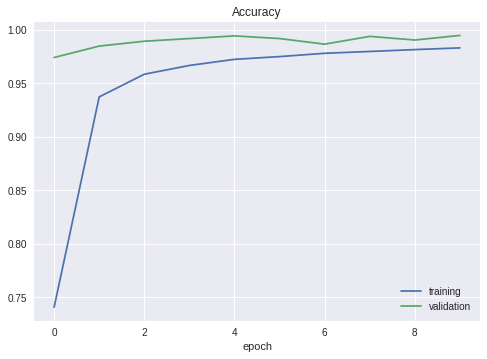

In [83]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [84]:
score=model.evaluate(X_test,y_test,verbose=0)
# print(type(score))    
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.120209786073254
Test accuracy: 0.9711797308185605


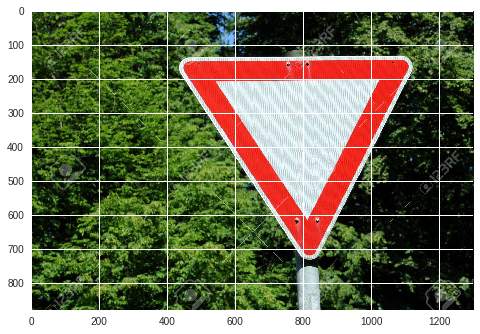

In [90]:
import requests
from PIL import Image
url ='https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))


(32, 32)


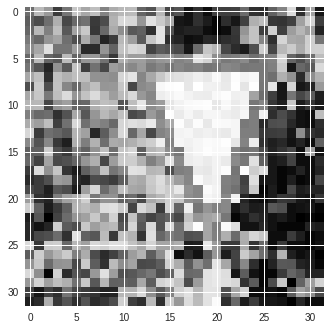

In [91]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [0]:
img = img.reshape(1, 32, 32, 1)

In [93]:
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [13]
